In [106]:
import pandas as pd

def read_file(traincsv, testcsv):
  f_train = pd.read_csv(traincsv)
  f_test = pd.read_csv(testcsv)
  return f_train, f_test



train_data, test_data = read_file('train.csv', 'test.csv')

print(train_data)

     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

Now we need to choose a method to validate the information. For this purpose we want to obtain the precision on the test data.

***- CHOOSE AN ASSESSMENT METHOD:***

In this case, since we have enough data to train and validate, we will use a reserve for testing.


***- PREPARING OUR DATA:***

In [107]:
import numpy as np
from sklearn import preprocessing as pp


# Train data

train_data = train_data.drop(['HomePlanet', 'Cabin', 'PassengerId', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'], axis = 1)
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(False)
train_data['Age'] = train_data['Age'].fillna(False)



train_labels = tuple(train_data['Transported'].apply(int))[:8000]

train_data = train_data.drop(columns = 'Transported')

train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)


train_data = pp.normalize(train_data)

# train_data = train_data.values.tolist()


train_data = train_data[:8000]





# Test
# test_labels = tuple(test_data['Transported'].apply(int))[:8000]
# test_data = test_data.drop(columns = 'Transported')


test_data['CryoSleep'] = test_data['CryoSleep'].fillna(False)
test_data['Age'] = test_data['Age'].fillna(False)


test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)
test_data = test_data.drop(['HomePlanet', 'Cabin', 'PassengerId', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'], axis = 1)

test_data = test_data.values.tolist()

test_data = test_data[:8000]





# print(test_data)
print(train_data)


# print(len(test_data))

[[0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 ...
 [0.0256326  0.99967143]
 [0.02499219 0.99968765]
 [0.         1.        ]]




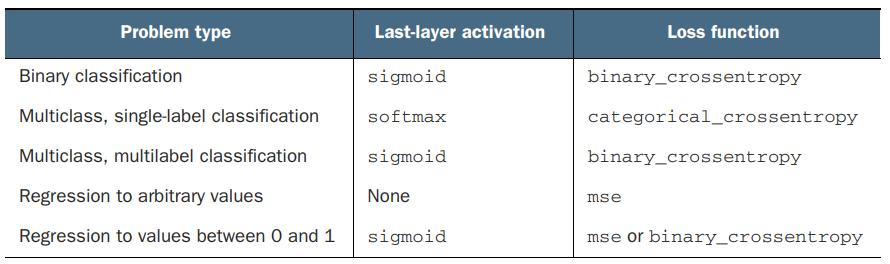

In [108]:
from keras import models, layers, regularizers


def building_model():
  model = models.Sequential()

  model.add(layers.Dense(units = 50, activation = 'relu', input_shape = (2,)))
  model.add(layers.Dropout(0.2))



  model.add(layers.Dense(units = 50, activation = 'relu'))
  model.add(layers.Dropout(0.2))



  model.add(layers.Dense(units = 1, activation = 'sigmoid'))


  return model


In [109]:
# Entrenamiento
x_train = np.array((train_data)) # Para entrenamiento.
x_labels = np.array((train_labels))


# Validación.


# Prueba final!
test_data = test_data[:4000]

***- Model (Configured, although very configurable it is not considerably better):***

In [110]:
from keras.callbacks import EarlyStopping
model = building_model()
import tensorflow as tf


opt = tf.keras.optimizers.Adam(beta_1 = 0.9, learning_rate = 0.001)
model.compile(optimizer = opt,
              loss = 'mse',
              metrics = ['acc'])
epochs_var = 72

es = EarlyStopping(monitor = 'loss', mode = 'min', verbose = 1, patience = 150)
fitModel = model.fit(x_train, x_labels,
                     epochs = epochs_var,
                     batch_size = 71,
                     callbacks = [es])



print(fitModel.history.keys())

Epoch 1/72
113/113 [==============================] - 1s 2ms/step - loss: 0.2478 - acc: 0.5303
Epoch 2/72
113/113 [==============================] - 0s 2ms/step - loss: 0.2456 - acc: 0.5479
Epoch 3/72
113/113 [==============================] - 0s 3ms/step - loss: 0.2406 - acc: 0.5993
Epoch 4/72
113/113 [==============================] - 0s 2ms/step - loss: 0.2352 - acc: 0.6240
Epoch 5/72
113/113 [==============================] - 0s 2ms/step - loss: 0.2258 - acc: 0.6650
Epoch 6/72
113/113 [==============================] - 0s 2ms/step - loss: 0.2171 - acc: 0.6925
Epoch 7/72
113/113 [==============================] - 0s 2ms/step - loss: 0.2111 - acc: 0.7089
Epoch 8/72
113/113 [==============================] - 0s 2ms/step - loss: 0.2068 - acc: 0.7151
Epoch 9/72
113/113 [==============================] - 0s 2ms/step - loss: 0.2047 - acc: 0.7156
Epoch 10/72
113/113 [==============================] - 0s 2ms/step - loss: 0.2051 - acc: 0.7161
Epoch 11/72
113/113 [============================

<Figure size 1440x864 with 0 Axes>

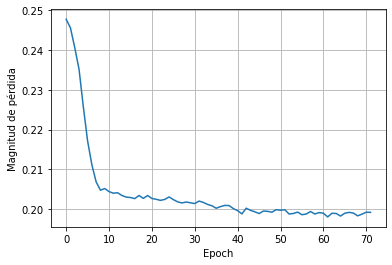

In [111]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 12))
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Magnitud de pérdida")
plt.plot(fitModel.history["loss"])
plt.grid()
plt.savefig('2.png')

plt.show()

***- MODEL THAT EXCEEDS A CONSIDERABLE LINE***

> Looking a bit at the dataset and what can be achieved, it seems that the loss line and the precision line are stuck near the same point according to each line: This can happen for several reasons: I have not prepared the data correctly (this is half statement half hypothesis, because I only receive 2 parameters from the entire network, so possibly the stagnation is due to that. I will polish these types of problems a little more when I have more experience). Or the 2nd reason: Directly proportional to how I prepared the data, this is your safe limit, a limit where there seems to be little room for improvement.

In [115]:
generate_predictions = model.predict(test_data[0:80])

a = []
# print(f'Hemos generado para tus inputs las siguientes predicciones {generate_predictions}, con una forma {generate_predictions.shape}')

for prediction in generate_predictions:
  a.append(float(prediction))

print(a)
model.save('TeleporterModel.h5') # Con este modelo entrenado podemos hacer predicciones sin volver a ejecutar nada.


[0.9781287908554077, 0.008898317813873291, 0.19464603066444397, 0.00010290596401318908, 0.007048487663269043, 0.0005353689193725586, 0.9989632368087769, 0.999313473701477, 0.9979116916656494, 0.0027660727500915527, 0.008898317813873291, 1.9683560822159052e-05, 2.493004831194412e-05, 1.3363284779188689e-05, 0.00558096170425415, 0.0013689398765563965, 0.007048487663269043, 1.247377076651901e-05, 0.0008561909198760986, 6.415067764464766e-05, 0.0006770193576812744, 0.028240442276000977, 0.19464603066444397, 0.0013689398765563965, 1.3775020590856002e-07, 0.0027660727500915527, 0.008898317813873291, 0.00025579333305358887, 0.00558096170425415, 0.999699056148529, 0.9899880886077881, 0.008898317813873291, 1.5115502719709184e-05, 0.0034959912300109863, 0.0027660727500915527, 0.008898317813873291, 0.9974188804626465, 0.0013689398765563965, 0.9815599322319031, 0.00033473968505859375, 0.0034959912300109863, 0.0006770193576812744, 0.5474740266799927, 0.3266339600086212, 0.007048487663269043, 0.9998